# Prologue

AKA *My Research*

## The cumulant expansion

The struggle has been too long, but we are starting to see the light...

## As you might recall...


We are trying to go beyond the GW approximation

and succeed in describing satellites.

## The spectral function

It looks like this:
\begin{equation}
 A(\omega) = \mathrm{Im}|G(\omega)|
\end{equation}

## GW vs Cumulant

Mathematically very different:

\begin{equation}
 G^{GW} (\omega) = \frac1{ \omega - \epsilon - \Sigma (\omega) } 
\end{equation}

\begin{equation}
 G^C(t_1, t_2) = G^0(t_1, t_2) e^{ i \int_{t_1}^{t_2} \int_{t'}^{t_2} dt' dt'' W (t', t'') }
\end{equation}

BUT they connect through $\mathrm{Im} W (\omega) = \frac1\pi \mathrm{Im} \Sigma ( \epsilon - \omega )$.

## Implementation

Using a multi-pole representation for $\Sigma^{GW}$:

\begin{equation}
 \mathrm{Im} W (\omega) = \frac1\pi \mathrm{Im} \Sigma ( \epsilon - \omega )
\end{equation}
\begin{equation}
 W (\tau) = - i \lambda \bigl[ e^{ i \omega_p \tau } \theta ( - \tau ) + e^{ - i \omega_p \tau } \theta ( \tau ) \bigr]
\end{equation}

## GW vs Cumulant

- GW:
\begin{equation}
 A(\omega) = \frac1\pi \frac{\mathrm{Im}\Sigma (\omega)} 
 { [ \omega - \epsilon - \mathrm{Re}\Sigma (\omega) ]^2 + 
 [ \mathrm{Im}\Sigma (\omega) ]^2}
\end{equation}

- Cumulant:
\begin{equation}
 A(\omega) = \frac1\pi \sum_{n=0}^{\infty} \frac{a^n}{n!} \frac{\Gamma}{ (\omega - \epsilon + n \omega_p)^2 + \Gamma^2 }
\end{equation}

In [29]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (9., 6.)
%matplotlib inline

In [30]:
# %run ../../../../../Code/SF/sf.py
sf_c = np.genfromtxt('spftot_exp_kpt_1_19_bd_1_4_s1.0_p1.0_800ev_np1.dat')
sf_gw = np.genfromtxt('spftot_gw_s1.0_p1.0_800ev.dat')
#!gvim spftot_exp_kpt_1_19_bd_1_4_s1.0_p1.0_800ev_np1.dat

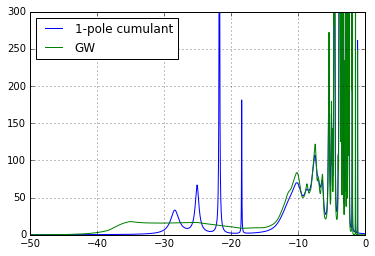

In [36]:
plt.plot(sf_c[:,0], sf_c[:,1], label='1-pole cumulant')
plt.plot(sf_gw[:,0], sf_gw[:,1], label='GW')
plt.xlim(-50, 0)
plt.ylim(0, 300)
plt.grid(); plt.legend(loc='best')

In [47]:
!gvim invar.in